In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read uploaded file
import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preview
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
# Drop unnecessary columns (like 'Unnamed: 0', 'Student ID' if present)
df_cleaned = df.drop(columns=["Unnamed: 0", "Student ID"], errors='ignore')

# Check column names
df_cleaned.columns


Index(['Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

/tmp/ipython-input-4-189012125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.values, y=average_scores.index, palette='coolwarm')


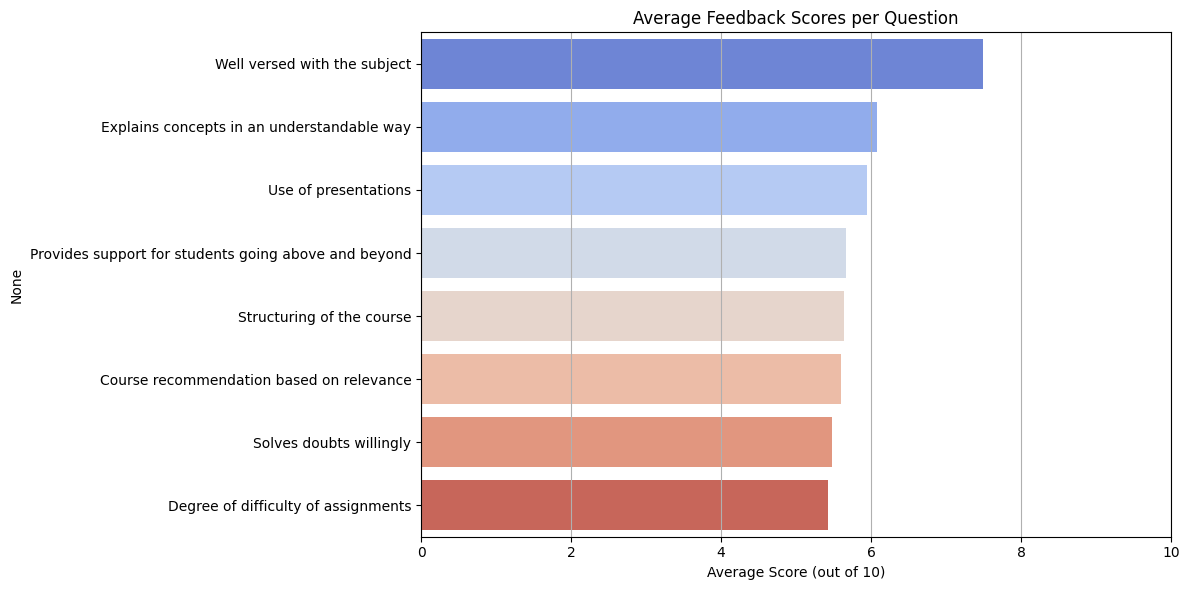

In [ ]:
# Average score for each feedback question
average_scores = df_cleaned.mean().sort_values(ascending=False)

# Bar plot of average scores
plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores.values, y=average_scores.index, palette='coolwarm')
plt.title('Average Feedback Scores per Question')
plt.xlabel('Average Score (out of 10)')
plt.xlim(0, 10)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
top_strengths = average_scores.head(3)
bottom_weaknesses = average_scores.tail(3)

print("✅ Top 3 Strengths:")
print(top_strengths)

print("\n❌ Bottom 3 Weaknesses:")
print(bottom_weaknesses)


✅ Top 3 Strengths:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

❌ Bottom 3 Weaknesses:
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


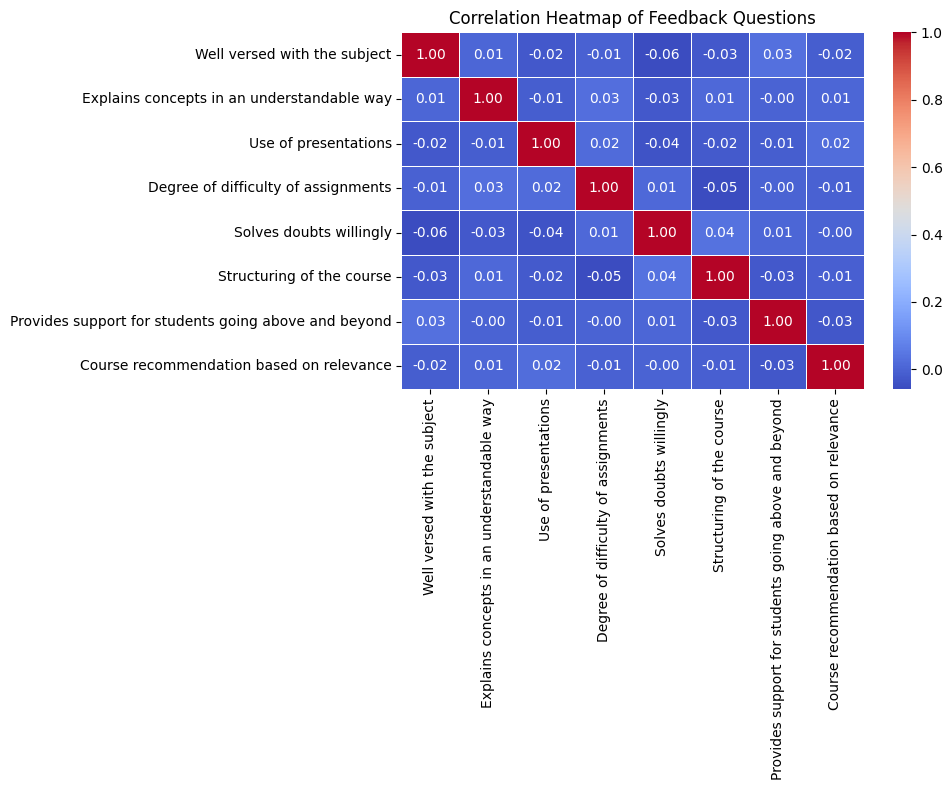

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Feedback Questions')
plt.tight_layout()
plt.show()

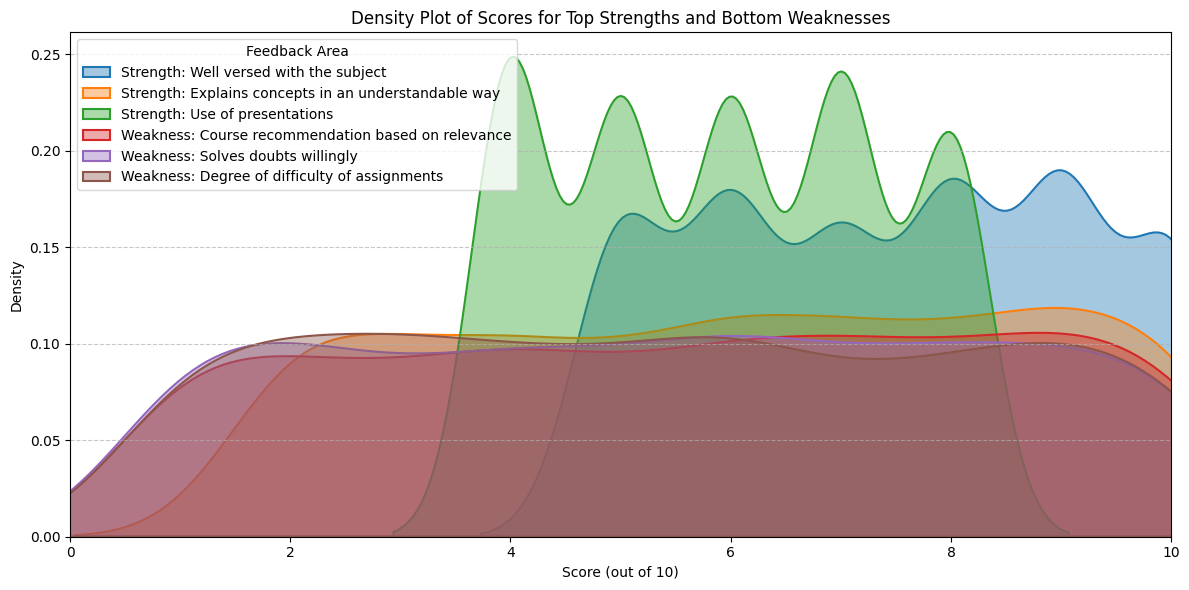

In [ ]:
# Get the names of the top 3 strengths and bottom 3 weaknesses
top_strength_cols = top_strengths.index.tolist()
bottom_weakness_cols = bottom_weaknesses.index.tolist()

plt.figure(figsize=(12, 6))

# Plot density for top strengths with adjusted alpha
for col in top_strength_cols:
    sns.kdeplot(df_cleaned[col], label=f'Strength: {col}', fill=True, alpha=0.4, linewidth=1.5) # Reduced alpha, added linewidth

# Plot density for bottom weaknesses with adjusted alpha
for col in bottom_weakness_cols:
    sns.kdeplot(df_cleaned[col], label=f'Weakness: {col}', fill=True, alpha=0.4, linewidth=1.5) # Reduced alpha, added linewidth

plt.title('Density Plot of Scores for Top Strengths and Bottom Weaknesses')
plt.xlabel('Score (out of 10)')
plt.ylabel('Density')
plt.legend(title='Feedback Area')
plt.xlim(0, 10) # Set consistent x-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-194323405.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_score_percentages.values, y=high_score_percentages.index, palette='viridis')


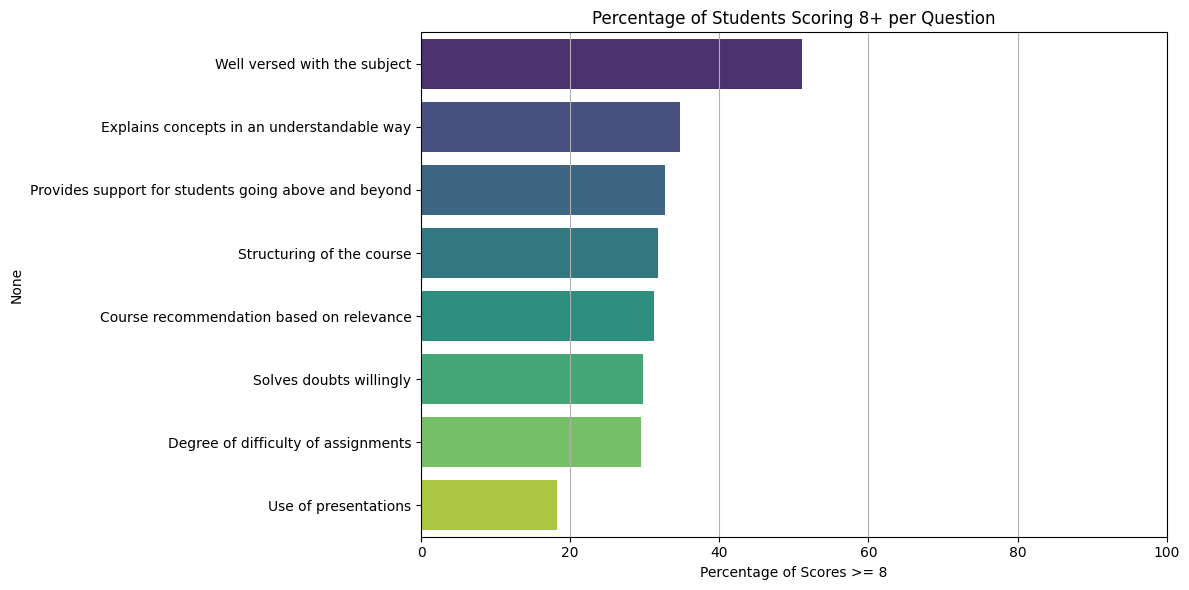

In [ ]:
# Calculate the percentage of scores >= 8 for each question
high_score_threshold = 8
high_score_percentages = (df_cleaned >= high_score_threshold).mean() * 100

# Sort the percentages for better visualization
high_score_percentages = high_score_percentages.sort_values(ascending=False)

# Create a bar plot of high score percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=high_score_percentages.values, y=high_score_percentages.index, palette='viridis')
plt.title(f'Percentage of Students Scoring {high_score_threshold}+ per Question')
plt.xlabel(f'Percentage of Scores >= {high_score_threshold}')
plt.xlim(0, 100) # Set x-axis limit to 100%
plt.grid(axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-2050496403.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=improvement_average_scores.values, y=improvement_average_scores.index, palette='viridis')


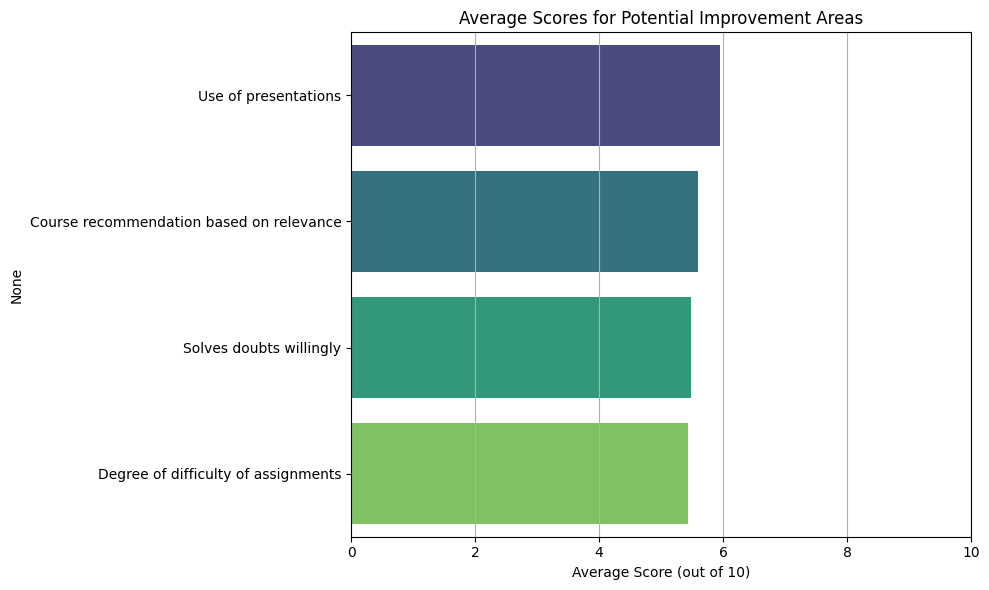

In [ ]:
# List of columns for potential improvement
improvement_cols = [
    "Degree of difficulty of assignments",
    "Solves doubts willingly",
    "Course recommendation based on relevance",
    "Use of presentations"
]

# Get the average scores for the improvement areas
improvement_average_scores = average_scores[improvement_cols]

# Sort the scores for better visualization
improvement_average_scores = improvement_average_scores.sort_values(ascending=False)

# Create a bar plot of average scores for improvement areas
plt.figure(figsize=(10, 6))
sns.barplot(x=improvement_average_scores.values, y=improvement_average_scores.index, palette='viridis')
plt.title('Average Scores for Potential Improvement Areas')
plt.xlabel('Average Score (out of 10)')
plt.xlim(0, 10)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Actionable Strategies Based on Student Feedback Analysis

Based on the analysis of student feedback, here are actionable strategies to improve the course, focusing on areas with lower scores:

**Overall Approach:** Prioritize areas with the lowest scores and tailor strategies.

**Specific Strategies for Areas of Potential Improvement:**

*   **Degree of difficulty of assignments:**
    *   **Strategy:** Adjust assignment difficulty and support.
    *   **Actions:** Review difficulty vs. learning goals, provide resources/examples, offer extra practice, clarify expectations, facilitate Q&A.

*   **Solves doubts willingly:**
    *   **Strategy:** Improve doubt resolution process.
    *   **Actions:** Clearly communicate availability, encourage questions, use Q&A sessions/forums, provide timely responses.

*   **Course recommendation based on relevance:**
    *   **Strategy:** Increase perceived course relevance.
    *   **Actions:** Connect content to real-world/careers, use relevant examples/case studies, discuss value beyond academics, gather student input on relevance.

*   **Use of presentations:**
    *   **Strategy:** Enhance presentation effectiveness.
    *   **Actions:** Vary methods, ensure clarity/organization, focus on explaining concepts, provide slides/notes, get feedback on presentations.

**Next Steps:** Review, prioritize, plan implementation, and collect follow-up feedback.